In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4+3*X +np.random.randn(100,1)

In [3]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.08284082],
       [2.86322387]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)


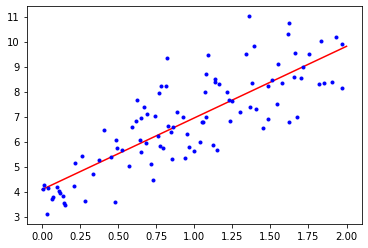

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

### SGD with learning schedule

In [7]:
n_epochs = 50
t0, t1 = 5,50
m= 100
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range (m):
        random_index = np.random.randint(m)
        xi =  X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*2 +i)
        theta = theta - eta*gradients

### SGD Linear Regression

In [8]:
from sklearn.linear_model import SGDRegressor, LinearRegression
sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [9]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08458534]), array([2.91355437]))

### Polynomial Regression

In [10]:
m = 100
X = 6* np.random.rand(m,1)-3
y = 0.5*X**2 +X+2+np.random.randn(m,1)

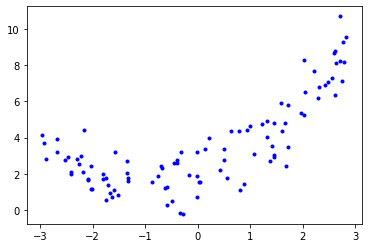

In [11]:
plt.plot(X,y,"b.")

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures (degree =2, include_bias= False)
X_poly = poly_features.fit_transform(X)


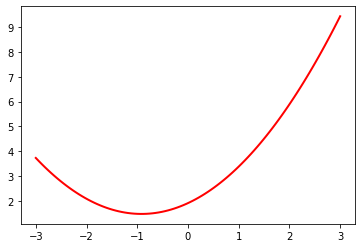

In [13]:
lin_reg =LinearRegression()
lin_reg.fit(X_poly,y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth= 2, label = "train")
    plt.plot(np.sqrt(val_errors), 'b-', linewidth= 3, label = "val")


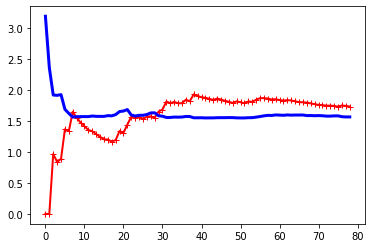

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

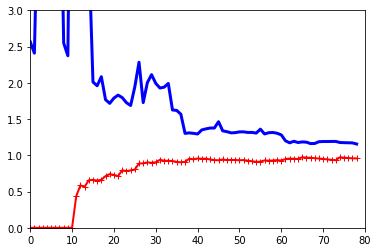

In [16]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline ([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias =False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

### Regularized Linear Models

#### Ridge Regression
* l2 regularization

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.01099966]])

In [18]:
sgd_reg = SGDRegressor (penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.98776429])

#### Lasso Regression
* l1 regularization

In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.96877991])

In [20]:
lasso_reg_2 = SGDRegressor(penalty = 'l1')
lasso_reg_2.fit(X,y.ravel())
lasso_reg_2.predict([[1.5]])

array([4.97399307])

### Elastic Net

In [21]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.96969993])

### Early Stopping

In [25]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures (degree=90, include_bias = False)),
    ('std_scaler', StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
X_train_poly = poly_scaler.fit_transform(X_train)
X_val_poly = poly_scaler.fit_transform(X_val)

In [45]:
sgd_reg = SGDRegressor(max_iter = 20, tol = -np.infty, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005)

3.1384117721019473 7 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=20, penalty=None,
             tol=-inf, warm_start=True)


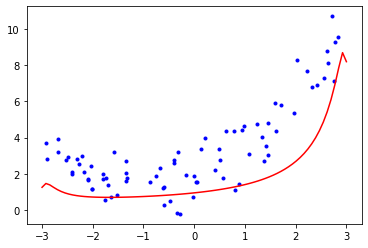

In [46]:
best_model = None
best_epoch = None
minimum_error = float(9999999)
for i in range(1000):
    sgd_reg.fit(X_train_poly,y_train.ravel())
    y_val_preds = sgd_reg.predict(X_val_poly)
    score = mean_squared_error(y_val,y_val_preds)
    if score<minimum_error: 
        minimum_error = score
        best_model = clone(sgd_reg)
        best_epoch = i
print(minimum_error, best_epoch, best_model)
best_model.fit(X_train_poly, y_train.ravel())
plt.plot(X_train, y_train, "b.")
Xtent = np.linspace(-3,3,80).reshape(80, 1)
Xtent_poly = poly_scaler.fit_transform(Xtent)
plt.plot(Xtent, best_model.predict(Xtent_poly), "r-")

    

### Logistic Regression

In [2]:
from sklearn import datasets
iris =datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [49]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(int)

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

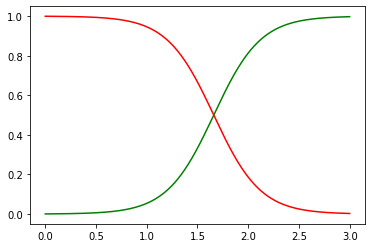

In [55]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1], "g-")
plt.plot(X_new,y_proba[:,0], "r-")

In [57]:
log_reg.predict([[1.5],[1.7]])

array([0, 1])

### Softmax Regression

In [70]:
X = iris['data'][:, (2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X,y)
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [25]:
X = iris["data"]
y = iris['target']
shuff_indices = np.random.choice(X.shape[0], len(X))
X = X[shuff_indices]
y = y[shuff_indices]

In [38]:
def one_hot(y):
    n_classes = 3
    m = len(y)
    y_one_hot = np.zeros((m, 3))
    y_one_hot[np.arange(m),y] = 1
    return y_one_hot

train = int(0.6 * len(X))
val = int(0.2 * len(X) + train)
test = int(0.2 * len(X) + val)
X_train,y_train = X[0:train], one_hot(y[0: train])
X_val,y_val = X[train:val], one_hot(y[train: val])
X_test,y_test = X[val:test], one_hot(y[val: test])


In [43]:
batch_size = 12

def batch(batch_size, inputs):
    indices = np.random.choice(inputs.shape[0], batch_size)
    return indices

def softmax(input):
    exp = np.exp(input)
    exp_sum = np.sum(exp, axis = 1, keepdims=True)
    return exp/exp_sum

n_inputs = X_train.shape[1]
n_outputs = 3
    

In [46]:
weights = np.random.randn(n_inputs, n_outputs)
for i in range(10000):
    batch_indices = batch(batch_size, X_train)
    X_batch, y_batch = X_train[batch_indices],(y_train[batch_indices])
    prod = X_batch.dot(weights)
    y_probs = softmax(prod)
    error = y_probs - y_batch
    grads = 1/batch_size * X_batch.T.dot(error)
    weights = weights - 0.01 * grads
    if i % 500 == 0:
        loss = -np.mean(np.sum(y_batch * np.log(y_probs + 1e-7), axis = 1))
        print(i, loss)


0 7.81002703133441
500 0.6193361263998493
1000 0.5296783549410129
1500 0.26960234201473077
2000 0.32812790565057304
2500 0.2161564255707943
3000 0.28772853200151743
3500 0.18058690430208157
4000 0.2553963954090304
4500 0.302424440113755
5000 0.18041430499959746
5500 0.1504185045273072
6000 0.16806567115374146
6500 0.18876194374913421
7000 0.12948533139083226
7500 0.30515368286551264
8000 0.13821271520595477
8500 0.16926793607501803
9000 0.22103358858627567
9500 0.07265151352115573


In [62]:
logits = X_val.dot(weights)
y_probs = softmax(logits)
predicts = np.argmax(y_probs, axis = 1)
answer = np.argmax(y_val, axis = 1)
print(np.mean(predicts == answer))

0.9666666666666667
